In [1]:
import pandas as pd
import numpy as np
import sklearn
import cv2
import mediapipe as mp

In [2]:
def get_input():

    indices=[0, 1, 2, 4, 5, 6, 7, 10, 13, 14, 17, 19, 21, 33, 37, 39, 40, 45, 48, 54, 58, 61, 64, 67, 78, 80, 81, 82, 84, 87, 88, 91, 93, 94, 95, 97, 98, 103, 109, 115, 127, 132, 133, 136, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 168, 172, 173, 176, 178, 181, 185, 191, 195, 197, 220, 234, 246, 249, 251, 263, 267, 269, 270, 275, 278, 284, 288, 291, 294, 297, 308, 310, 311, 312, 314, 317, 318, 321, 323, 324, 326, 327, 332, 338, 344, 356, 361, 362, 365, 373, 374, 375, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 389, 390, 397, 398, 400, 402, 405, 409, 415, 440, 454, 466]
    cap = cv2.VideoCapture(0)
    face_detection = mp.solutions.face_detection.FaceDetection()
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5)
    t_some=[]

    success, frame = cap.read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_detection.process(frame_rgb)

    if results.detections:
        for detection in results.detections:
            bounding_box = detection.location_data.relative_bounding_box
            x = int(bounding_box.xmin * frame.shape[1])
            y = int(bounding_box.ymin * frame.shape[0])
            w = int(bounding_box.width * frame.shape[1])
            h = int(bounding_box.height * frame.shape[0])
    else:
        print("bounding box detection failed")

    crop_img = frame[y-30:y+h+10, x-20:x+w+20]

    rgb_frame = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb_frame)

    if results.multi_face_landmarks:
        for i in results.multi_face_landmarks:
            for j in indices:
                t_some.append(i.landmark[j].x)
                t_some.append(i.landmark[j].y)
    else:
        print("feature detection failed")
                
    cap.release()
    return t_some, crop_img

In [10]:
df=pd.read_csv('tilt_train_crop_some.csv')
print(df)
df_test=pd.read_csv('tilt_test_crop_some.csv')
print(df_test)

             1         2         3         4         5         6         7  \
0     0.481610  0.683786  0.475982  0.557125  0.479672  0.591459  0.473955   
1     0.489505  0.692930  0.479061  0.567046  0.484571  0.601489  0.475893   
2     0.486030  0.701164  0.476479  0.568937  0.481233  0.604081  0.473550   
3     0.497281  0.699237  0.487668  0.572799  0.492114  0.607000  0.484876   
4     0.502578  0.692685  0.493922  0.569694  0.498071  0.601300  0.491234   
...        ...       ...       ...       ...       ...       ...       ...   
1004  0.327473  0.717206  0.431942  0.618442  0.404968  0.641046  0.461220   
1005  0.335078  0.721749  0.438473  0.621954  0.410816  0.643871  0.466384   
1006  0.328318  0.721121  0.429230  0.618661  0.403743  0.642866  0.456833   
1007  0.342337  0.733648  0.440494  0.631702  0.415965  0.654689  0.467548   
1008  0.339761  0.721301  0.441503  0.622967  0.414601  0.644006  0.469260   

             8         9        10  ...       256       257    

In [4]:
df.isnull().sum()

1         0
2         0
3         0
4         0
5         0
         ..
261       0
262       0
263       0
264       0
degree    0
Length: 265, dtype: int64

In [5]:
df=df.dropna().reset_index(drop=True)
df.isnull().sum()

1         0
2         0
3         0
4         0
5         0
         ..
261       0
262       0
263       0
264       0
degree    0
Length: 265, dtype: int64

In [6]:
df_test.isnull().sum()

1         0
2         0
3         0
4         0
5         0
         ..
261       0
262       0
263       0
264       0
degree    0
Length: 265, dtype: int64

In [21]:
df_test=df_test.dropna().reset_index(drop=True)
df_test.isnull().sum()

1         0
2         0
3         0
4         0
5         0
         ..
261       0
262       0
263       0
264       0
degree    0
Length: 265, dtype: int64

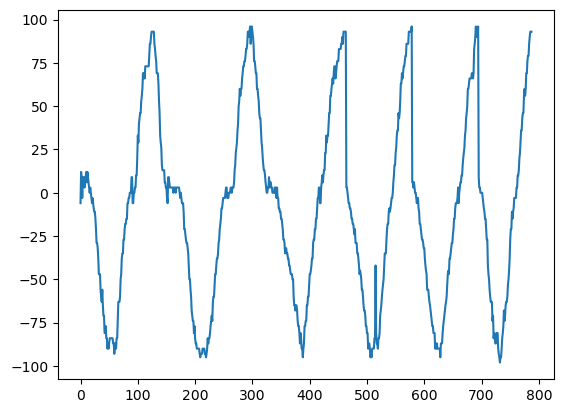

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(len(df['1'].tolist())),df['degree'].tolist())
plt.show()

In [11]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
print(X)
print(Y)

X_test = df_test.iloc[:, :-1].values
Y_test = df_test.iloc[:, -1].values
print(X_test)
print(Y_test)

[[0.48160985 0.68378562 0.47598168 ... 0.38887408 0.74573189 0.311185  ]
 [0.48950472 0.69293016 0.47906148 ... 0.3964842  0.73985505 0.31798244]
 [0.48603049 0.70116353 0.47647855 ... 0.39764875 0.73940021 0.321015  ]
 ...
 [0.32831776 0.72112078 0.42923042 ... 0.7953589  0.85794514 0.64603811]
 [0.34233737 0.73364806 0.44049382 ... 0.79183257 0.87038279 0.64622939]
 [0.33976093 0.72130054 0.44150299 ... 0.76773238 0.86675918 0.62839115]]
[  0.90938045   0.86805145   1.76239102 ... -41.28471089 -40.48601154
 -39.52263127]
[[0.48547119 0.66715676 0.48623338 ... 0.42098945 0.73629999 0.3171505 ]
 [0.47818977 0.66964799 0.47467381 ... 0.43220115 0.72405809 0.3271848 ]
 [0.47412682 0.66184384 0.47023547 ... 0.42196074 0.73081452 0.31071737]
 ...
 [0.34338885 0.6941818  0.45982647 ... 0.79971033 0.86569643 0.62492657]
 [0.34484324 0.70488489 0.46020255 ... 0.80451071 0.86885196 0.63165474]
 [0.34044212 0.6936841  0.45265669 ... 0.77508104 0.86612636 0.61159021]]
[  0.          -3.2397003  

In [12]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)#n_estimators determines how many trees are trained on different subsets of the data and features, and how their predictions are averaged to produce the final output
regressor.fit(X, Y)

RandomForestRegressor()

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200, 500]
}

rf_regressor = RandomForestRegressor()
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5)
grid_search.fit(X, Y)

best_n_estimators = grid_search.best_params_['n_estimators']

In [16]:
print(best_n_estimators)

100


In [13]:
y_pred = regressor.predict(X_test)
print(np.concatenate((Y_test.reshape(len(Y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[ 0.00000000e+00  1.04639524e+00]
 [-3.23970030e+00  5.21006360e-01]
 [ 0.00000000e+00 -1.82662383e+00]
 [-3.23970030e+00 -1.74044425e+00]
 [-4.48460601e+00 -4.94143185e-02]
 [-2.20259816e+00  1.28205125e+00]
 [-2.24574257e+00 -1.16516469e+00]
 [-2.20259816e+00 -1.86038147e+00]
 [-2.24574257e+00  1.61315847e-01]
 [-3.36646066e+00 -1.43192402e+00]
 [-3.36646066e+00 -1.31631790e+00]
 [-1.16913933e+00 -1.23661341e+00]
 [-1.16913933e+00 -1.13121662e+00]
 [-3.36646066e+00 -1.79398006e+00]
 [-2.38594403e+00 -8.24747562e-02]
 [-1.14576284e+00 -1.04046733e+00]
 [-1.16913933e+00 -1.32287639e+00]
 [ 0.00000000e+00 -1.76878230e+00]
 [ 0.00000000e+00 -9.95379993e-01]
 [ 2.33730586e+00 -1.34778309e+00]
 [ 1.16913933e+00  1.18236324e+00]
 [ 1.19348942e+00 -1.35003624e+00]
 [ 0.00000000e+00  8.90972993e-01]
 [ 1.16913933e+00  7.20460254e-01]
 [ 0.00000000e+00  9.25898809e-01]
 [ 1.19348942e+00 -1.68015333e+00]
 [ 1.19348942e+00 -1.77667466e+00]
 [ 0.00000000e+00  9.60743131e-01]
 [-1.21887524e+00  6

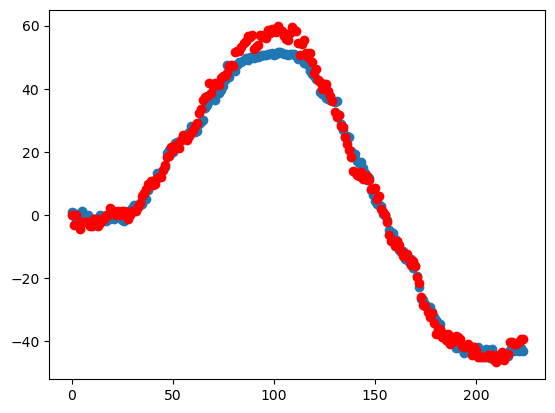

In [14]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_pred)), y_pred)
plt.scatter(range(len(y_pred)), Y_test, color='red')
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

r2 = r2_score(Y_test, y_pred)
print("R-squared:", r2) 

mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

mse = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mse)

R-squared: 0.991002346205057
Mean Squared Error: 10.28875212514374
Mean Absolute Error: 2.4680115450286197


In [16]:
#tilt
listin,frame=get_input()
if len(listin)==0:
    raise Exception("input is empty")
y_pred = regressor.predict([listin])
print("Predicted degree:",y_pred)
print("Input (",len(listin),"):")
print(listin)
cv2.imshow('Face Detection', cv2.flip(frame, 1))
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\RS7un\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Predicted degree: [54.60666653]
Input ( 264 ):
[0.22082440555095673, 0.670598566532135, 0.1546919047832489, 0.5633082389831543, 0.2145860642194748, 0.5955953598022461, 0.14421889185905457, 0.5329205989837646, 0.15279513597488403, 0.49356454610824585, 0.1908503770828247, 0.39381033182144165, 0.10086897015571594, 0.4064144492149353, 0.16773328185081482, 0.14038488268852234, 0.2485441416501999, 0.7062470316886902, 0.2517080307006836, 0.7245227098464966, 0.26157939434051514, 0.7773404121398926, 0.1738155484199524, 0.5796562433242798, 0.09174787998199463, 0.31364044547080994, 0.09715032577514648, 0.3998149335384369, 0.1971326470375061, 0.6687734127044678, 0.18664833903312683, 0.6812090277671814, 0.188054621219635, 0.6988589763641357, 0.12662473320960999, 0.536702573299408, 0.1378345489501953, 0.5611004829406738, 0.065009206533432, 0.262651652097702, 0.25678157806396484, 0.6882624626159668, 0.2029135823249817, 0.729101300239563, 0.1531645655632019, 0.5748440027236938, 0.06933930516242981, 0.